# Telco customers Churn 
>* We are trying to predict if customer will leave Telco or not using Mahchine learning

## Data:-
>* this dataset is from IBM to get it [visit](https://community.ibm.com/accelerators/?context=analytics&query=churn%20&type=Data)
>* This dataset contains 7043 observations with 33 variables



In [1]:
## Importing imp tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
import xgboost as xgb
import seaborn as sns

import graphviz
import seaborn as sns
from yellowbrick.classifier import classification_report

In [2]:
import tensorflow as tf

In [3]:
divices = tf.config.list_physical_devices('GPU')
print('Available Devices: ', len(divices))

Available Devices:  0


In [4]:
### Data 

In [5]:
df = pd.DataFrame(pd.read_excel("C:\SagarKV\Git_ML_Proj\Machine Learning Projects\Classification\Telco_churn_prediction\Data\Telco_customer_churn.xlsx") )
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [6]:
pd.pandas.set_option("display.max_columns", None)

In [7]:
df.describe(include="all")

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
count,7043,7043.0,7043,7043,7043,7043.000000,7043,7043.000000,7043.000000,7043,7043,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.0,7043,7043.000000,7043.000000,7043.000000,1869
unique,7043,NaN,1,1,1129,NaN,1652,NaN,NaN,2,2,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531.0,2,NaN,NaN,NaN,20
top,3668-QPYBK,NaN,United States,California,Los Angeles,NaN,"33.964131, -118.272783",NaN,NaN,Male,No,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No,NaN,NaN,NaN,Attitude of support person
freq,1,NaN,7043,7043,305,NaN,5,NaN,NaN,3555,5901,3641,5416,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11.0,5174,NaN,NaN,NaN,192
mean,NaN,1.0,NaN,NaN,NaN,93521.964646,NaN,36.282441,-119.798880,NaN,NaN,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN,0.265370,58.699418,4400.295755,NaN
std,NaN,0.0,NaN,NaN,NaN,1865.794555,NaN,2.455723,2.157889,NaN,NaN,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN,0.441561,21.525131,1183.057152,NaN
min,NaN,1.0,NaN,NaN,NaN,90001.000000,NaN,32.555828,-124.301372,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN,0.000000,5.000000,2003.000000,NaN
25%,NaN,1.0,NaN,NaN,NaN,92102.000000,NaN,34.030915,-121.815412,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN,0.000000,40.000000,3469.000000,NaN
50%,NaN,1.0,NaN,NaN,NaN,93552.000000,NaN,36.391777,-119.730885,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN,0.000000,61.000000,4527.000000,NaN
75%,NaN,1.0,NaN,NaN,NaN,95351.000000,NaN,38.224869,-118.043237,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN,1.000000,75.000000,5380.500000,NaN


In [8]:
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [9]:
df.isna().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [10]:
categorical_features = [ feature for feature, content in df.items() if content.dtype == "O" ]
len(categorical_features), categorical_features

(24,
 ['CustomerID',
  'Country',
  'State',
  'City',
  'Lat Long',
  'Gender',
  'Senior Citizen',
  'Partner',
  'Dependents',
  'Phone Service',
  'Multiple Lines',
  'Internet Service',
  'Online Security',
  'Online Backup',
  'Device Protection',
  'Tech Support',
  'Streaming TV',
  'Streaming Movies',
  'Contract',
  'Paperless Billing',
  'Payment Method',
  'Total Charges',
  'Churn Label',
  'Churn Reason'])

In [11]:
numerical_features =  [ feature for feature, content in df.items() if content.dtype != "O"  ]

numerical_features, len(numerical_features)

(['Count',
  'Zip Code',
  'Latitude',
  'Longitude',
  'Tenure Months',
  'Monthly Charges',
  'Churn Value',
  'Churn Score',
  'CLTV'],
 9)

In [12]:
for feature , content in df.items():
    print(f" \n{feature}  have {df[feature].nunique()} unique values ")

 
CustomerID  have 7043 unique values 
 
Count  have 1 unique values 
 
Country  have 1 unique values 
 
State  have 1 unique values 
 
City  have 1129 unique values 
 
Zip Code  have 1652 unique values 
 
Lat Long  have 1652 unique values 
 
Latitude  have 1652 unique values 
 
Longitude  have 1651 unique values 
 
Gender  have 2 unique values 
 
Senior Citizen  have 2 unique values 
 
Partner  have 2 unique values 
 
Dependents  have 2 unique values 
 
Tenure Months  have 73 unique values 
 
Phone Service  have 2 unique values 
 
Multiple Lines  have 3 unique values 
 
Internet Service  have 3 unique values 
 
Online Security  have 3 unique values 
 
Online Backup  have 3 unique values 
 
Device Protection  have 3 unique values 
 
Tech Support  have 3 unique values 
 
Streaming TV  have 3 unique values 
 
Streaming Movies  have 3 unique values 
 
Contract  have 3 unique values 
 
Paperless Billing  have 2 unique values 
 
Payment Method  have 4 unique values 
 
Monthly Charges  have 

>* All employyes are from  country - USA, state - califirnia ,
these columns would not matter in label prediction 
>* Customer is equal to len of df so it will not have impack on churn of customer
>* Also last four columns have data of exit interview so not usefull for prediction beause we eant to predict before someone leaves Telco and  lat long also
>* Churn value and churn label are same so drop one 

In [13]:
df.head(3)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved


In [14]:
# Drop all above parts
df.drop(['CustomerID', 'State', 'Country', 'Count', 'Lat Long', 'Gender', 'Churn Label', 'Churn Score','CLTV', 'Churn Reason'],
         axis=1, inplace=True)

In [15]:
df.City.unique()

array(['Los Angeles', 'Beverly Hills', 'Huntington Park', ..., 'Standish',
       'Tulelake', 'Olympic Valley'], dtype=object)

In [16]:
df.City.replace(" ", "_",regex=True ,inplace=True)

In [17]:
df.City.unique()

array(['Los_Angeles', 'Beverly_Hills', 'Huntington_Park', ..., 'Standish',
       'Tulelake', 'Olympic_Valley'], dtype=object)

In [18]:
df.columns = df.columns.str.replace(" ", "_",)

In [19]:
df.columns

Index(['City', 'Zip_Code', 'Latitude', 'Longitude', 'Senior_Citizen',
       'Partner', 'Dependents', 'Tenure_Months', 'Phone_Service',
       'Multiple_Lines', 'Internet_Service', 'Online_Security',
       'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV',
       'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method',
       'Monthly_Charges', 'Total_Charges', 'Churn_Value'],
      dtype='object')

In [20]:
df.isna().sum()

City                 0
Zip_Code             0
Latitude             0
Longitude            0
Senior_Citizen       0
Partner              0
Dependents           0
Tenure_Months        0
Phone_Service        0
Multiple_Lines       0
Internet_Service     0
Online_Security      0
Online_Backup        0
Device_Protection    0
Tech_Support         0
Streaming_TV         0
Streaming_Movies     0
Contract             0
Paperless_Billing    0
Payment_Method       0
Monthly_Charges      0
Total_Charges        0
Churn_Value          0
dtype: int64

In [21]:
df.head()

,City,Zip_Code,Latitude,Longitude,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los_Angeles,90010,34.062125,-118.315709,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [22]:
categorical_features

['CustomerID',
 'Country',
 'State',
 'City',
 'Lat Long',
 'Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Total Charges',
 'Churn Label',
 'Churn Reason']

In [23]:
df.Total_Charges.unique()

array([108.15, 151.65, 820.5, ..., 7362.9, 346.45, 6844.5], dtype=object)

> **Note** - Total charges is object it should be numeric

In [24]:
# df["Total_Charges"] = pd.to_numeric(df.Total_Charges)       # Output showimg column contains space (" ") strings

ValueError: Unable to parse string " " at position 2234

In [26]:
len(df.loc[ df.Total_Charges == " "])         # 11 columns with blank spaces

11

In [69]:
len(df)

7032

In [68]:
df = ((df[df.Total_Charges.isin(["_"]) == False]))

In [70]:
df["Total_Charges"] = pd.to_numeric(df.Total_Charges)

C:\Users\SAGAR KESHAVE\AppData\Local\Temp\ipykernel_6236\1515317610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Total_Charges"] = pd.to_numeric(df.Total_Charges)


In [43]:
len(df.loc[ df.Total_Charges == " "])        # No blank spaces


0

In [71]:
df.Total_Charges.dtype

dtype('float64')

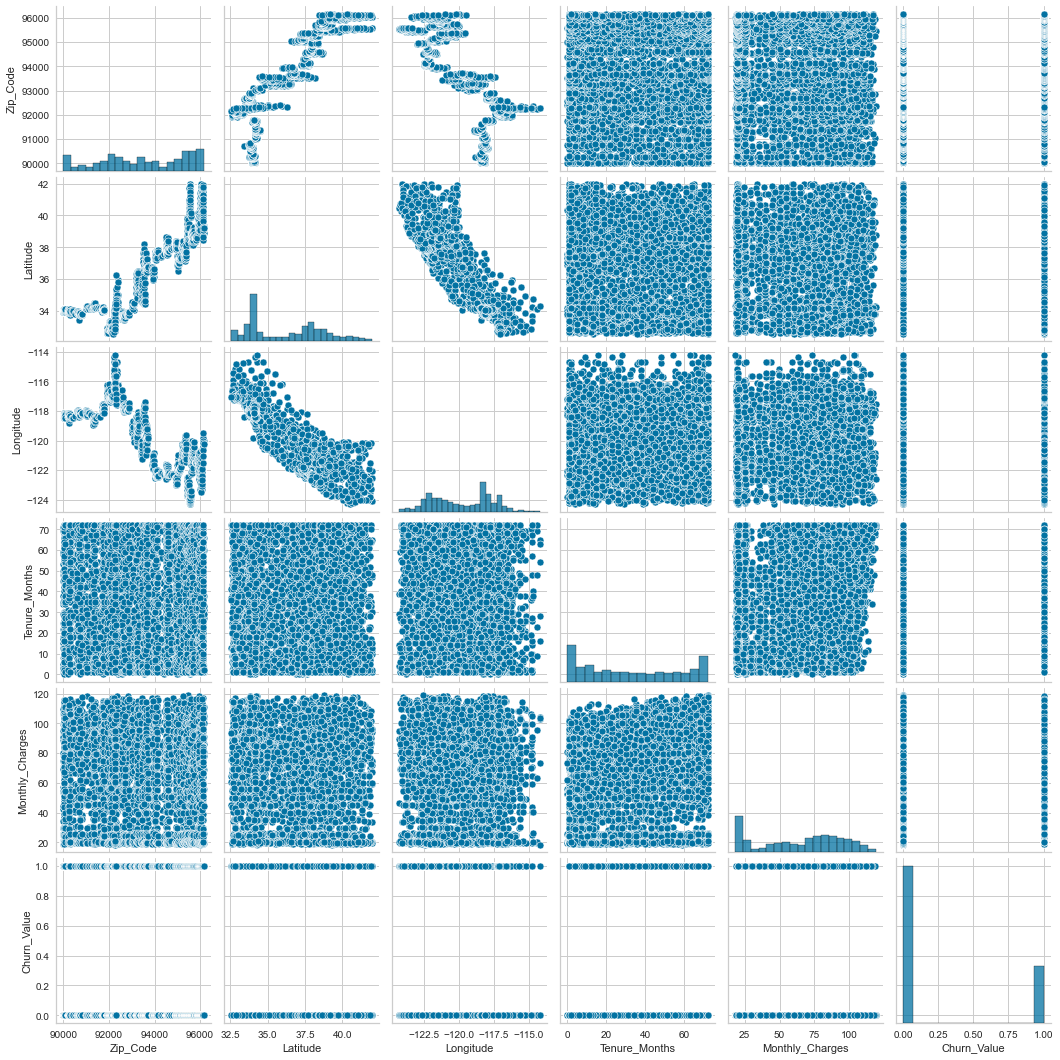

In [44]:
sns.pairplot(df)

In [47]:
df.Churn_Value.value_counts()

0    5174
1    1869
Name: Churn_Value, dtype: int64

### Modeling 

In [72]:
# Data split

X = df.drop("Churn_Value", axis=1)
y = df.Churn_Value

In [73]:
X.shape, y.shapeb


AttributeError: 'Series' object has no attribute 'shapeb'

In [74]:
df.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
Churn_Value            int64
dtype: object

In [76]:
X_encoded = pd.get_dummies(X)
X_encoded

Zip_Code   Latitude   Longitude  Tenure_Months  Monthly_Charges  \
0        90003  33.964131 -118.272783              2            53.85   
1        90005  34.059281 -118.307420              2            70.70   
2        90006  34.048013 -118.293953              8            99.65   
3        90010  34.062125 -118.315709             28           104.80   
4        90015  34.039224 -118.266293             49           103.70   
...        ...        ...         ...            ...              ...   
7038     92285  34.341737 -116.539416             72            21.15   
7039     92301  34.667815 -117.536183             24            84.80   
7040     92304  34.559882 -115.637164             72           103.20   
7041     92305  34.167800 -116.864330             11            29.60   
7042     92308  34.424926 -117.184503             66           105.65   

      Total_Charges  City_Acampo  City_Acton  City_Adelanto  City_Adin  \
0            108.15            0           0              0          0   
1            151.65            0           0              0          0   
2            820.50            0           0              0          0   
3           3046.05            0           0              0          0   
4           5036.30            0           0              0          0   
...             ...          ...         ...            ...        ...   
7038        1419.40            0           0              0          0   
7039        1990.50            0           0              1          0   
7040        7362.90            0           0              0          0   
7041         346.45            0           0              0          0   
7042        6844.50            0           0              0          0   

      City_Agoura_Hills  City_Aguanga  City_Ahwahnee  City_Alameda  \
0                     0             0              0             0   
1                     0             0              0             0   
2                     0             0              0             0   
3                     0             0              0             0   
4                     0             0              0             0   
...                 ...           ...            ...           ...   
7038                  0             0              0             0   
7039                  0             0              0             0   
7040                  0             0              0             0   
7041                  0             0              0             0   
7042                  0             0              0             0   

      City_Alamo  City_Albany  City_Albion  City_Alderpoint  City_Alhambra  \
0              0            0            0                0              0   
1              0            0            0                0              0   
2              0            0            0                0              0   
3              0            0            0                0              0   
4              0            0            0                0              0   
...          ...          ...          ...              ...            ...   
7038           0            0            0                0              0   
7039           0            0            0                0              0   
7040           0            0            0                0              0   
7041           0            0            0                0              0   
7042           0            0            0                0              0   

      City_Aliso_Viejo  City_Alleghany  City_Alpaugh  City_Alpine  City_Alta  \
0                    0               0             0            0          0   
1                    0               0             0            0          0   
2                    0               0             0            0          0   
3                    0               0             0            0          0   
4                    0               0             0          

In [89]:
y.value_counts()

0    5163
1    1869
Name: Churn_Value, dtype: int64

C:\Users\SAGAR KESHAVE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn_Value', ylabel='count'>

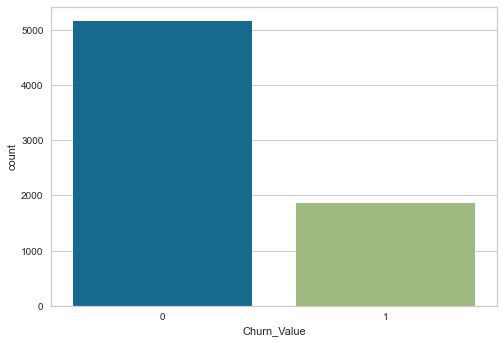

In [92]:
sns.countplot(y)

## Split data set into train and test set 
>*  Using stratify this helps to maintain percentage of 0:1 which is 0.2653 in both trian and test set

In [93]:
X_train, X_test, y_train, y_test =  train_test_split(X_encoded, y, random_state=1, stratify=y)

#### Now check stratify worked or not

In [94]:
print(sum(y_train)/len(y_train))
print(sum(y_test)/len(y_test))

0.2658323852863102
0.2656427758816837


# Build XGBOOST
>* Here we took objective as binary:logistic(Which is deafult for xgbclassifier) beause for classification xgboost uses logistic regression aproch to evaluate how good it is in classifying.
>* Here param -> "missing=None" means missing values are represented as '0'.

In [109]:
clf_xgd = xgb.XGBClassifier(objective='binary:logistic',missing=0,seed=1,use_label_encoder=False)

C:\Users\SAGAR KESHAVE\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [110]:
clf_xgd.fit(X_train, y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set =[(X_test,y_test)])
            
# early stopping = after building 10 trees if accuracy does not impover then it will stop after 10 trees           

C:\Users\SAGAR KESHAVE\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\SAGAR KESHAVE\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-aucpr:0.63383
[1]	validation_0-aucpr:0.64557
[2]	validation_0-aucpr:0.65485
[3]	validation_0-aucpr:0.65810
[4]	validation_0-aucpr:0.65996
[5]	validation_0-aucpr:0.66374
[6]	validation_0-aucpr:0.66541
[7]	validation_0-aucpr:0.66396
[8]	validation_0-aucpr:0.66468
[9]	validation_0-aucpr:0.66530
[10]	validation_0-aucpr:0.66120
[11]	validation_0-aucpr:0.65985
[12]	validation_0-aucpr:0.66017
[13]	validation_0-aucpr:0.65835
[14]	validation_0-aucpr:0.65725
[15]	validation_0-aucpr:0.65775


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=0, monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1, ...)

In [111]:
from sklearn.metrics import ConfusionMatrixDisplay

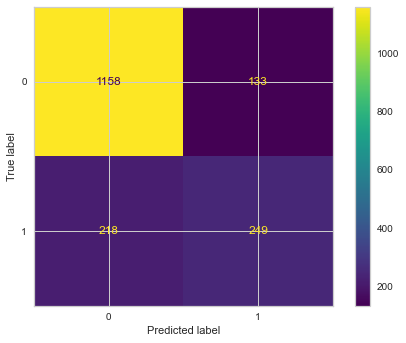

In [114]:
## Lets plot confustion matix

predictions = clf_xgd.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf_xgd.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf_xgd.classes_)
disp.plot()

plt.show()

In [117]:
from sklearn.metrics import accuracy_score

In [118]:
clf_testpreds = clf_xgd.predict(X_test)
accuracy_score(y_test, clf_testpreds)

0.8003412969283277

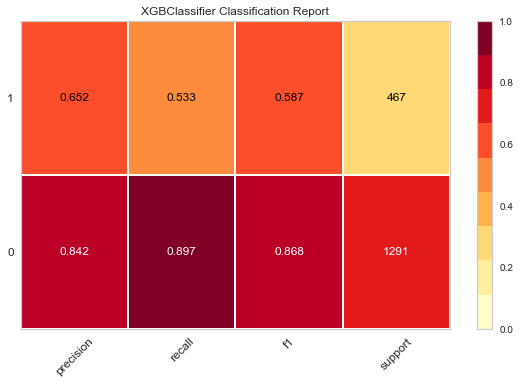

In [119]:
classes=['Did not leave', 'Left']
visulizer=classification_report(clf_xgd,X_train, y_train, X_test, y_test,ClassificationReport=classes, support=True )

**Note** We are getting accuracy high but less precision and recall of customers who are leaving and so we need to deal with this imbalanced data

### Optimization of xgb using cross validation

**NOTE**- beause of imbalanced class we are not getting much accuracy so their is one parameter in xgb to deal with imbalanced data it adds penalty for incorrecly classifying minority class data 
>* scale_pos_weight - note xgb recommends sum(negative instances)/sum(+ve instances)
>* reg_lambda - regularization parameter
>* max_depth- depth of tree
>* gamma - parameter that encourages pruning( gain- gamma)

In [120]:
y.value_counts()

0    5163
1    1869
Name: Churn_Value, dtype: int64

In [121]:
1869/5174

0.36122922303826827

In [122]:
param_grid ={
    'max_depth': [4, 5, 6],
    'learning_rate': [0, 0.01, 0.1, 0.3],
    'gamma': [0, 1, 2],
    'reg_lambda':[0,1,2,10],
    'scale_pos_weight':[0.36,2,5]
}

In [123]:
%%time
# Here we are using subsample-0.9 and colsample_bytree-0.5 to overcome overfitting
# for each tree it will use random 90% of data and only 50% of columns and its speeds things up also
# when we have imbalanced data xgb recoomeds to use auc socing metrics

optimal_xgb = GridSearchCV(xgb.XGBClassifier(
                                             objective='binary:logistic',missing=None,
                                            use_label_encoder=False,
                                            subsample=0.9,
                                            colsample_bytree=0.5),
                             param_grid=param_grid,
                             scoring='roc_auc',
                             cv=4,
                             n_jobs=10)

CPU times: total: 0 ns
Wall time: 959 µs


C:\Users\SAGAR KESHAVE\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [124]:
%%time
optimal_xgb.fit(X_train,y_train,
               early_stopping_rounds=10,
               eval_metric='auc',
               eval_set=[(X_test,y_test)],
               verbose=2)

C:\Users\SAGAR KESHAVE\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\SAGAR KESHAVE\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\SAGAR KESHAVE\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan na

[0]	validation_0-auc:0.50000
[2]	validation_0-auc:0.50000
[4]	validation_0-auc:0.50000
[6]	validation_0-auc:0.50000
[8]	validation_0-auc:0.50000
[10]	validation_0-auc:0.50000
CPU times: total: 20.5 s
Wall time: 25min 31s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=None, monotone_constraints=None,
                 

In [125]:
optimal_xgb.best_params_

{'gamma': 0,
 'learning_rate': 0,
 'max_depth': 4,
 'reg_lambda': 0,
 'scale_pos_weight': 0.36}

In [130]:
ideal_xgb = xgb.XGBClassifier(seed =1,
                              objective ='binary:logistic',
                              
                              gamma=0,
                              learning_rate=0,
                              max_depth=4,
                              reg_lambda=0,
                              scale_pos_weight=2,
                              subsample=0.9,
                              colsample_bytree=0.5)


In [134]:
ideal_xgb = xgb.XGBClassifier(seed =1,
                              objective ='binary:logistic',
                              
                              gamma=0,
                              learning_rate=0.1,
                              max_depth=4,
                              reg_lambda=10,
                              scale_pos_weight=2,
                              subsample=0.9,
                              colsample_bytree=0.5)


In [135]:
%%time
ideal_xgb.fit(X_train,y_train,
              verbose=True,
              early_stopping_rounds=10,
             eval_set=[(X_test,y_test)],
             eval_metric='aucpr')



C:\Users\SAGAR KESHAVE\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\SAGAR KESHAVE\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-aucpr:0.55387
[1]	validation_0-aucpr:0.60891
[2]	validation_0-aucpr:0.62072
[3]	validation_0-aucpr:0.63010
[4]	validation_0-aucpr:0.64095
[5]	validation_0-aucpr:0.64200
[6]	validation_0-aucpr:0.64925
[7]	validation_0-aucpr:0.66789
[8]	validation_0-aucpr:0.66948
[9]	validation_0-aucpr:0.66821
[10]	validation_0-aucpr:0.66695
[11]	validation_0-aucpr:0.66602
[12]	validation_0-aucpr:0.66829
[13]	validation_0-aucpr:0.66802
[14]	validation_0-aucpr:0.66753
[15]	validation_0-aucpr:0.66791
[16]	validation_0-aucpr:0.66685
[17]	validation_0-aucpr:0.66991
[18]	validation_0-aucpr:0.66958
[19]	validation_0-aucpr:0.67040
[20]	validation_0-aucpr:0.67391
[21]	validation_0-aucpr:0.67518
[22]	validation_0-aucpr:0.67450
[23]	validation_0-aucpr:0.67411
[24]	validation_0-aucpr:0.67536
[25]	validation_0-aucpr:0.67668
[26]	validation_0-aucpr:0.67506
[27]	validation_0-aucpr:0.67516
[28]	validation_0-aucpr:0.67546
[29]	validation_0-aucpr:0.67448
[30]	validation_0-aucpr:0.67425
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1, ...)

C:\Users\SAGAR KESHAVE\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


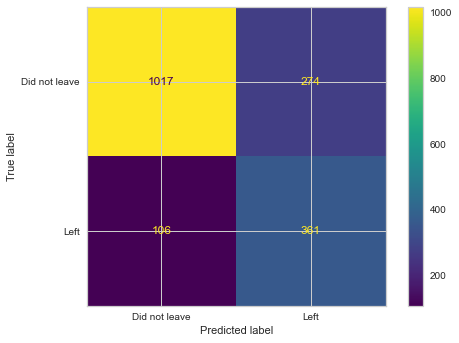

In [136]:
plot_confusion_matrix(ideal_xgb,
                     X_test,y_test,
                     display_labels=['Did not leave', 'Left'])

In [137]:
1291+267


1558

**Note** - Notice this model has better classified customers who were going to leave telco thats good cause we want to classify people who can leave telco

### Predictions on test set

In [138]:
test_preds = ideal_xgb.predict(X_test)

In [139]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, test_preds)

0.7838452787258248

In [140]:
balanced_accuracy_score(y_test, test_preds)

0.7803903486001755

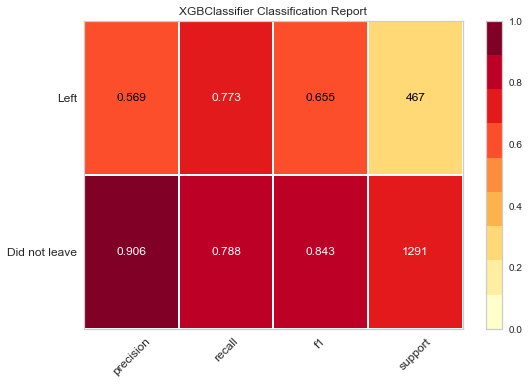

In [141]:
classification_report(ideal_xgb, X_train,y_train, X_test, y_test, classes=classes, support=True);

In [142]:
### Feature Importances

In [143]:
ideal_xgb.feature_importances_

array([0.00573893, 0.00445306, 0.00392599, ..., 0.00289456, 0.01494653,
       0.00402986], dtype=float32)

In [144]:
def plot_feature(columns, importances, n=20 ):
    df_ =(pd.DataFrame({'features':columns,
                      'feature_importances':importances})
         .sort_values('feature_importances', ascending=False)
         .reset_index(drop=True))
    sns.barplot(x='feature_importances',
                y='features',
               data=df_[:n],
               )                  

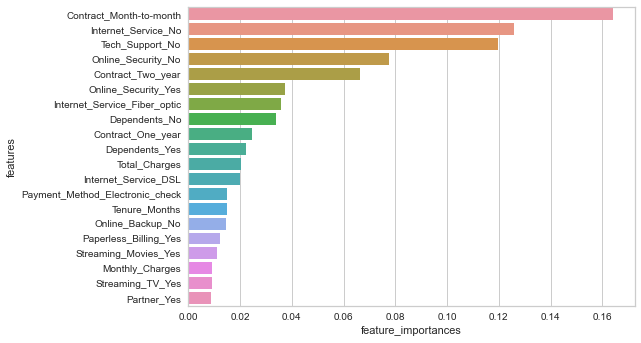

In [145]:
plot_feature(X_train.columns, ideal_xgb.feature_importances_)

In [147]:
# As expected top 6 features are main cause for leaving cause